In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

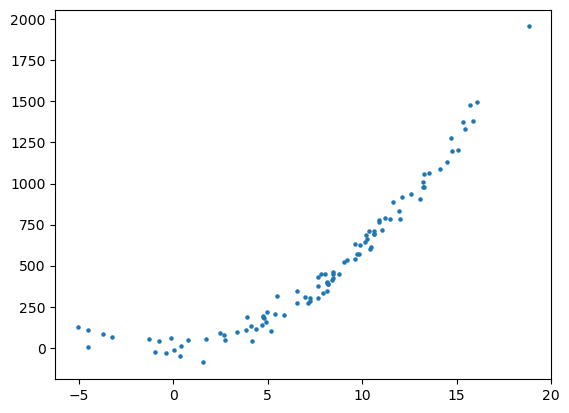

In [2]:
# 模拟数据
X = np.random.randn(100) * 5 + 7
error = np.random.randn(100) * 50
Y_obs = 5 * X ** 2 + 10 * X + error

plt.scatter(X, Y_obs, s=5)

In [3]:
# Elastic Net regularization parameters
lambda_ = 0.12  # Ridge (L2) 正则化参数
alpha_ = 0.05  # Lasso (L1) 正则化参数

with pm.Model() as model_elastic_net:
    # Priors for unknown model parameters with elastic net regularization
    # a with both L1 and L2 penalties
    a = pm.Laplace('a', mu=0, b=1/(lambda_ * alpha_)) + \
        pm.Normal('a_ridge', mu=0, sigma=1/np.sqrt(2*(lambda_ * (1 - alpha_))))
    # b with both L1 and L2 penalties
    b = pm.Laplace('b', mu=0, b=1/(lambda_ * alpha_)) + \
        pm.Normal('b_ridge', mu=0, sigma=1/np.sqrt(2*(lambda_ * (1 - alpha_))))
    # c with both L1 and L2 penalties
    c = pm.Laplace('c', mu=0, b=1/(lambda_ * alpha_)) + \
        pm.Normal('c_ridge', mu=0, sigma=1/np.sqrt(2*(lambda_ * (1 - alpha_))))

    # Expected value of outcome
    mu = a * X ** 2 + b * X + c

    # Likelihood (sampling distribution) of observations
    Y = pm.Normal('Y', mu=mu, sigma=10, observed=Y_obs)

    # Sampling
    trace_elastic_net = pm.sample(1000, tune=1000, return_inferencedata=True)

# Plot the results
pm.plot_trace(trace_elastic_net)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, a_ridge, b, b_ridge, c, c_ridge]


Output()

In [ ]:
X_test = np.linspace(np.floor(X.min()), np.ceil(X.max()), 100)

# 真值
Y_true = 5 * X_test ** 2 + 10 * X_test

# 计算后验平均值
a_posterior_mean = trace_elastic_net.posterior["a"].mean().values
b_posterior_mean = trace_elastic_net.posterior["b"].mean().values
c_posterior_mean = trace_elastic_net.posterior["c"].mean().values
Y_fit = a_posterior_mean * X_test ** 2 + b_posterior_mean * X_test + c_posterior_mean

# 计算后验标准差
a_posterior_std = trace_elastic_net.posterior["a"].std().values
b_posterior_std = trace_elastic_net.posterior["b"].std().values
c_posterior_std = trace_elastic_net.posterior["c"].std().values
Y_errorpred = a_posterior_std * X_test ** 2 + b_posterior_std * X_test + c_posterior_std

edge1 = Y_fit + Y_errorpred
edge2 = Y_fit - Y_errorpred

crosspoint = 0
for i in range(len(X_test)):
    if edge1[i] < edge2[i]:
        crosspoint = i
        break

MSE = np.mean((Y_fit - Y_true) ** 2)

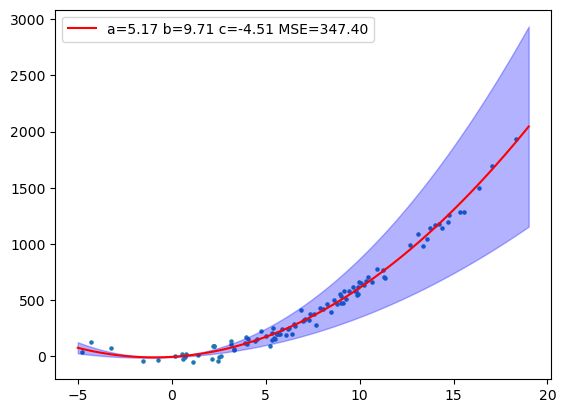

In [ ]:
# 绘制填充区间
# 绘制数据点
plt.scatter(X, Y_obs, s=5)

# 绘制后验平均拟合线
plt.plot(X_test, Y_fit, color='red', label='a={:.2f} b={:.2f} c={:.2f} MSE={:.2f}'.format(
         a_posterior_mean, b_posterior_mean, c_posterior_mean, MSE))

if crosspoint:
    plt.fill_between(X_test[:crosspoint], edge2[:crosspoint], edge1[:crosspoint], color='blue', alpha=0.3, 
                     label='Uncertainty')
    plt.fill_between(X_test[crosspoint:], edge1[crosspoint:], edge2[crosspoint:], color='blue', alpha=0.3)
else:
    plt.fill_between(X_test, edge2, edge1, color='blue', alpha=0.3)

# 显示图例
plt.legend()

# 显示图表
plt.show()

#347.4

Appendix:

Laplace分布的形式$$\text{Laplace}(\mu,b)=\frac{1}{2b}\exp \left\{-\frac{|x-\mu|}{b}\right\}$$

In [11]:
import numpy as np
import matplotlib.pyplot as plt

test = np.linspace(-10, 10, 100)
mu = 0
b = 1
Lap = 1 / (2*b) * np.exp(- abs(test - mu) / b)

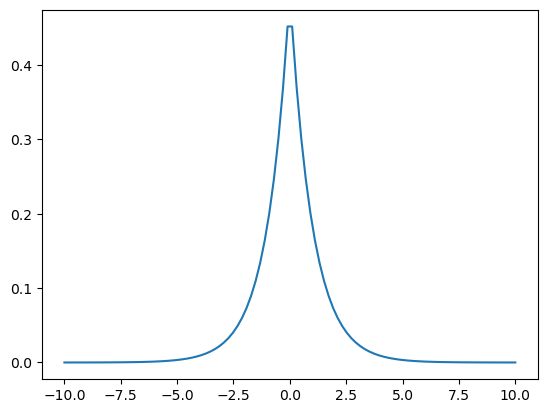

In [12]:
plt.plot(test, Lap)